In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Reference Dicts

In [304]:
work_dict = {1: "Respondent's home or yard",
    2:  "Respondent's workplace",
    3:  "Someone else's home",
    4:  "Restaurant or bar",
    5:  "Place of worship",
    6:  "Grocery store ",
    7:  "Other store/mall",
    8:  "School",
    9:  "Outdoors away from home",
    10: "Library",
    11: "Other place",
    12: "Car, truck, or motorcycle (driver)",
    13: "Car, truck, or motorcycle (passenger)",
    14: "Walking",
    15: "Bus",
    16: "Subway/train",
    17: "Bicycle",
    18: "Boat/ferry",
    19: "Taxi/limousine service",
    20: "Airplane",
    21: "Other mode of transportation",
    30: "Bank",
    31: "Gym/health club",
    32: "Post Office",
    89: "Unspecified place",
    99: "Unspecified mode of transportation"}

who_dict = {18: "Alone",
    19: "Alone",
    20: "Spouse",
    21: "Unmarried partner",
    22: "Own household child",
    23: "Grandchild",
    24: "Parent",
    25: "Brother/sister",
    26: "Other related person",
    27: "Foster child",
    28: "Housemate/roommate",
    29: "Roomer/boarder",
    30: "Other nonrelative",
    40: "Own nonhousehold child < 18",
    51: "Parents (not living in household)",
    52: "Other nonhousehold family members < 18",
    53: "Other nonhousehold family members 18 and older (including parents-in-law)",
    54: "Friends",
    56: "Neighbors/acquaintances",
    57: "Other nonhousehold children < 18",
    58: "Other nonhousehold adults 18 and older",
    59: "Boss or manager",
    60: "People whom I supervise",
    61: "Co-workers",
    62: "Customers"}

cbsas = [10420, 10580, 10740, 10900, 11100, 11460, 11540, 11700, 12020, 12060, 12220, 12260, 12420, 12540, 12580, 12940, 12980, 
         13460, 13740, 13820, 13980, 14260, 15180, 15380, 15940, 15980, 16060, 16300, 16540, 16620, 16700, 16740, 16820, 16860, 
         16980, 17020, 17140, 17420, 17460, 17780, 17820, 17900, 17980, 18140, 18580, 19100, 19300, 19340, 19660, 19740, 19780, 
         19820, 20100, 20500, 21140, 21340, 21500, 21660, 21780, 22020, 22180, 22220, 22420, 22500, 22520, 22900, 23060, 23420,
         23540, 24020, 24340, 24540, 24580, 24660, 24780, 24860, 25420, 25860, 25940, 26420, 26580, 26620, 26820, 26900, 27100, 
         27140, 27260, 27340, 27500, 27740, 28140, 28420, 28660, 28700, 28940, 29180, 29200, 29340, 29460, 29540, 29620, 29820, 
         30460, 30780, 30980, 31080, 31140, 31180, 31540, 32580, 32820, 33100, 33340, 33460, 33660, 33700, 33740, 33780, 33860, 
         34060, 34740, 34940, 34980, 35380, 35620, 35660, 35840, 36100, 36220, 36260, 36420, 36540, 36740, 36780, 37100, 37460, 
         37860, 37900, 37980, 38060, 38300, 38900, 39340, 39540, 39580, 39740, 39820, 40060, 40140, 40220, 40380, 40420, 40900, 
         41100, 41180, 41420, 41500, 41540, 41620, 41700, 41740, 41860, 41940, 42020, 42200, 42220, 42540, 42660, 43300, 43340, 
         43620, 43780, 43900, 44060, 44180, 44700, 45060, 45220, 45300, 45460, 45780, 45820, 45940, 46060, 46140, 46340, 46540, 
         46700, 47260, 47300, 47380, 47900, 47940, 48140, 48620, 48660, 48700, 49020, 49180, 49620, 49660, 49740]



# Data Labeling

In [305]:
# Import ATUS data
df_act  = pd.read_csv('./data/ATUS_2020/atusact-2020/atusact_2020.dat')
df_cps  = pd.read_csv('./data/ATUS_2020/atuscps-2020/atuscps_2020.dat')
df_resp = pd.read_csv('./data/ATUS_2020/atusresp-2020/atusresp_2020.dat')
df_rost = pd.read_csv('./data/ATUS_2020/atusrost-2020/atusrost_2020.dat')
df_sum = pd.read_csv('./data/ATUS_2020/atussum-2020/atussum_2020.dat')
df_who = pd.read_csv('./data/ATUS_2020/atuswho-2020/atuswho_2020.dat')

In [ ]:
# Filter respondents to those in CBSAs we care about
df_cps = df_cps[df_cps['GTCBSA'].isin(cbsas)]

In [ ]:
# Filter to after the start of the pandemic
df_resp = df_resp[df_resp['TUMONTH']>3]

In [ ]:
# Apply filters to activity data
df_act = df_act[df_act['TUCASEID'].isin(df_resp['TUCASEID'])]
df_act = df_act[df_act['TUCASEID'].isin(df_cps['TUCASEID'])]

In [ ]:
# Filter activity to only respondents who are working
df_act_work = df_act[df_act['TUTIER1CODE']==5].copy()
df_act_work = df_act_work[['TUCASEID', 'TUACTIVITY_N', 'TEWHERE', 'TUACTDUR', 'TUACTDUR24', 'TUCC5', 'TUCC5B', 
                           'TUCC7', 'TUCC8', 'TUCUMDUR', 'TUCUMDUR24', 'TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 
                           'TRCODE', 'TRTIER2']]

In [ ]:
# Examine location of work [TEWHERE] and label clear observations
df_act_work_clear = df_act_work[df_act_work['TEWHERE'].isin([1,2,12])].copy()
df_act_work_clear['WFH'] = df_act_work_clear['TEWHERE'].apply(lambda x: 1 if x==1 else 0)
df_act_work_ambig = df_act_work[~df_act_work['TEWHERE'].isin([1,2,12])].copy()

In [ ]:
# create network tie-types from WHO data
df_who_c = df_who.copy()
df_who_c['coresident_tie'] = df_who_c['TUWHO_CODE']<40
df_who_c['work_tie'] = df_who_c['TUWHO_CODE']>58
df_who_c['nclf_tie'] = df_who_c['TUWHO_CODE'].isin([40,51,52,53])
df_who_c['social_tie'] = df_who_c['TUWHO_CODE'].isin([54,56,57,58])
df_who_c = df_who_c[['TUCASEID','TUACTIVITY_N','coresident_tie','work_tie','nclf_tie','social_tie']]
df_who_c = df_who_c.groupby(['TUCASEID','TUACTIVITY_N']).max()
df_who_c = df_who_c.reset_index()

In [ ]:
# Using WHO data, label additional cases by using work-ties and add to labeled results DF
df_act_work_ambig = df_act_work_ambig.merge(df_who_c[df_who_c['work_tie']==True], on=['TUCASEID','TUACTIVITY_N'], how='left')
df_act_work_ambig = df_act_work_ambig.replace(np.nan, False)
df_act_work_clarified = df_act_work_ambig[df_act_work_ambig['work_tie']==True].copy()
df_act_work_clarified = df_act_work_clarified.drop(columns=['coresident_tie','work_tie','nclf_tie', 'social_tie'])
df_act_work_clarified['WFH'] = 0
df_act_work_clear = pd.concat([df_act_work_clear, df_act_work_clarified], axis=0)

In [ ]:
# Get remaining ambiguous results
df_act_work_ambig = df_act_work_ambig[~df_act_work_ambig['work_tie']==True].copy()

In [ ]:
# Filter cases involving work-related travel
df_act_work_travel = df_act[df_act['TUCASEID'].isin(df_act_work_ambig['TUCASEID'])]
df_act_work_travel = df_act_work_travel[(df_act_work_travel['TUTIER1CODE']==18) & (df_act_work_travel['TUTIER2CODE']==5)]
df_act_work_travel_clarified = df_act_work_ambig[df_act_work_ambig['TUCASEID'].isin(df_act_work_travel['TUCASEID'])].copy()

In [ ]:
# Add clarified observations back to results
df_act_work_travel_clarified = df_act_work_travel_clarified.drop(columns=['coresident_tie','work_tie','nclf_tie', 'social_tie'])
df_act_work_travel_clarified['WFH'] = 0
df_act_work_clear = pd.concat([df_act_work_clear, df_act_work_travel_clarified], axis=0)

In [ ]:
# Get remaining ambiguous cases
df_act_work_ambig = df_act_work_ambig[~df_act_work_ambig['TUCASEID'].isin(df_act_work_travel['TUCASEID'])].copy()


In [ ]:
# Just add them back with 1/2 weight
df_act_work_ambig = df_act_work_ambig.drop(columns=['coresident_tie','work_tie','nclf_tie', 'social_tie'])
df_act_work_ambig['WFH'] = 0.5
df_act_work_clear = pd.concat([df_act_work_clear, df_act_work_ambig], axis=0)

# Beta Distributions

In [ ]:
# Import WFH prior data
df_wfh = pd.read_csv('./data/Occupation_WFH/wfh_scores.csv')

In [ ]:
# Aggregate current data to CBSAs and join
df_cbsa = df_cps[['TUCASEID','GTCBSA']].drop_duplicates()
df_new_wfh = df_act_work_clear[['TUCASEID','WFH']].groupby('TUCASEID').max().reset_index()
df_new_wfh = df_cbsa.merge(df_new_wfh, on='TUCASEID', how='inner')[['GTCBSA','WFH']]
df_new_wfh['count'] = 1
df_new_wfh = df_new_wfh.groupby('GTCBSA').sum()
df_new_wfh['new_wfh_score'] = df_new_wfh['WFH'] / df_new_wfh['count']
df_new_wfh = df_new_wfh.reset_index()
df_new_wfh = df_new_wfh.rename(columns={'WFH':'wfh_count'})
df = df_new_wfh.merge(df_wfh, on='GTCBSA', how='inner')

In [307]:
# Check the relationship between new and original wfh data
stats.pearsonr(df['wfh_score'], df['new_wfh_score'])

PearsonRResult(statistic=0.2009966164267348, pvalue=0.005065210729008397)

In [308]:
# Function to create posteriors

def beta_posterior_df(df, n, method):
    df = df.copy()
    
    if method == 'int':
        df['temp_alpha'] = (df['wfh_score'] * n) // 1
        df['temp_beta'] = n - df['temp_alpha']
        df['s'] = 1
        
    elif method == 'scalar':
        df['s'] = df['count'] * n
        df['temp_alpha'] = (df['wfh_score'] * df['s']) // 1
        df['temp_beta'] = df['s'] - df['temp_alpha']
    

    df['alpha'] = df['temp_alpha'] + df['wfh_count']
    df['beta'] = df['temp_beta'] + df['count'] - df['wfh_count']
    df['beta_mean'] = stats.beta.mean(df['alpha'], df['beta'])
    df = df.drop(columns=['temp_alpha', 'temp_beta', 's'])
    return(df)

## Using n prior samples

n_priors=0     PearsonRResult(statistic=0.32654108026681844, pvalue=0.0002019407958603362)
n_priors=1     PearsonRResult(statistic=0.3589608248811642, pvalue=8.616576847025987e-06)
n_priors=2     PearsonRResult(statistic=0.4890527071105022, pvalue=3.769224087713488e-10)
n_priors=3     PearsonRResult(statistic=0.6243165982597395, pvalue=2.4105886404271977e-18)
n_priors=5     PearsonRResult(statistic=0.5730099099609814, pvalue=3.097121181931883e-18)
n_priors=10    PearsonRResult(statistic=0.7165765380183714, pvalue=1.0505996632986592e-31)
n_priors=15    PearsonRResult(statistic=0.7476751579696423, pvalue=8.463763382637554e-36)
n_priors=20    PearsonRResult(statistic=0.7927862311459688, pvalue=6.170615390387618e-43)
n_priors=30    PearsonRResult(statistic=0.8361922496264612, pvalue=1.0249649183527812e-51)
n_priors=40    PearsonRResult(statistic=0.8685999061306722, pvalue=3.775736569878246e-60)
n_priors=50    PearsonRResult(statistic=0.8932067084396946, pvalue=3.2188165485347667e-68)
n_pri

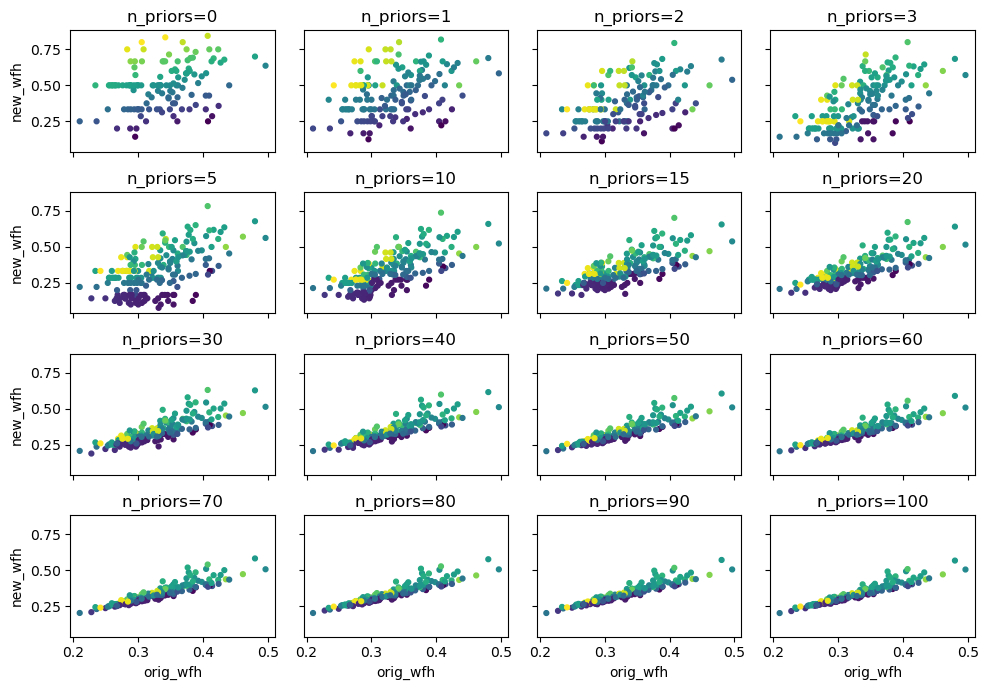

In [309]:
fig, ax = plt.subplots(4,4,figsize=(10,7), sharex=True, sharey=True)

for i in range(0,16):
    if i < 4:
        x = i
    elif i > 3 and i < 8:
        x = (i-3) * 5
    else: 
        x = (i-5)*10

    df_beta = beta_posterior_df(df, x, 'int')
    df_beta['wfh_difference'] = df_beta['new_wfh_score'] - df_beta['wfh_score']
    ax[i//4, i%4].scatter(df_beta['wfh_score'], df_beta['beta_mean'], c=df_beta['wfh_difference'], s=12)
    if i%4 == 0:
        ax[i//4, i%4].set_ylabel('new_wfh')
    if i//4 == 3:
        ax[i//4, i%4].set_xlabel('orig_wfh')
    s = f"n_priors={x}"
    s = s + ' '*(14-len(s))
    print(s, stats.pearsonr(df_beta[~df_beta['beta_mean'].isna()]['wfh_score'], df_beta[~df_beta['beta_mean'].isna()]['beta_mean']))
    ax[i//4, i%4].set_title(f'n_priors={x}')
plt.tight_layout()

## Using a scalar * n_new_samples

n_priors=0     PearsonRResult(statistic=0.32654108026681844, pvalue=0.0002019407958603362)
n_priors=1     PearsonRResult(statistic=0.4530502228170189, pvalue=2.555504842655794e-09)
n_priors=2     PearsonRResult(statistic=0.5812467537330437, pvalue=5.099782918436398e-17)
n_priors=3     PearsonRResult(statistic=0.7092385305070064, pvalue=3.900669437012797e-29)
n_priors=5     PearsonRResult(statistic=0.6289064704767896, pvalue=1.2040369388199968e-22)
n_priors=10    PearsonRResult(statistic=0.7184083507149992, pvalue=6.246769599143684e-32)
n_priors=15    PearsonRResult(statistic=0.7684976220806956, pvalue=6.838172054476634e-39)
n_priors=20    PearsonRResult(statistic=0.799165571557897, pvalue=4.3380242721025236e-44)
n_priors=25    PearsonRResult(statistic=0.8137794635505236, pvalue=6.786706024673449e-47)
n_priors=30    PearsonRResult(statistic=0.8589579798614926, pvalue=2.014256724527375e-57)
n_priors=35    PearsonRResult(statistic=0.8706311750855837, pvalue=9.438548834256345e-61)
n_priors

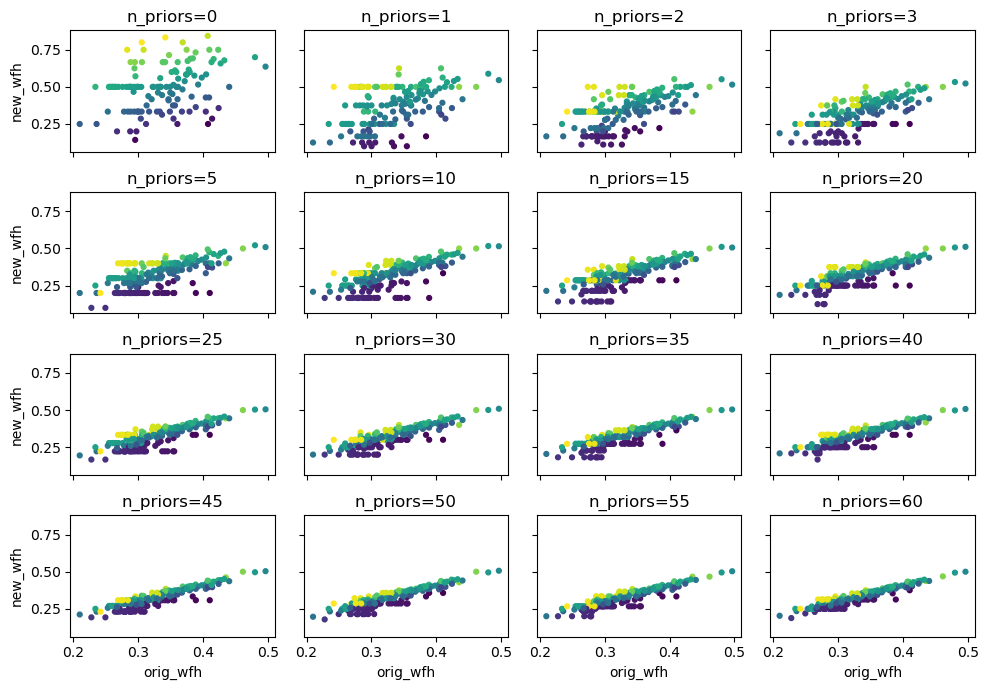

In [310]:
fig, ax = plt.subplots(4,4,figsize=(10,7), sharex=True, sharey=True)

for i in range(0,16):
    if i < 4:
        x = i
    elif i > 3:
        x = (i-3) * 5
    df_beta = beta_posterior_df(df, i, 'scalar')
    df_beta['wfh_difference'] = df_beta['new_wfh_score'] - df_beta['wfh_score']
    ax[i//4, i%4].scatter(df_beta['wfh_score'], df_beta['beta_mean'], c=df_beta['wfh_difference'], s=12)
    if i%4 == 0:
        ax[i//4, i%4].set_ylabel('new_wfh')
    if i//4 == 3:
        ax[i//4, i%4].set_xlabel('orig_wfh')
    ax[i//4, i%4].set_title(f'n_priors={x}*new_sample')
    s = f"n_priors={x}"
    s = s + ' '*(14-len(s))
    print(s, stats.pearsonr(df_beta[~df_beta['beta_mean'].isna()]['wfh_score'], df_beta[~df_beta['beta_mean'].isna()]['beta_mean']))
    ax[i//4, i%4].set_title(f'n_priors={x}')
plt.tight_layout()

# Export Data

In [311]:
dfs = []

for i in range(5,16):
    df_beta = beta_posterior_df(df, i, 'int')
    df_beta['wfh_difference'] = df_beta['new_wfh_score'] - df_beta['wfh_score']
    s = f'wfh_posterior_n{i}'
    df_beta = df_beta.rename(columns={'beta_mean':s})
    df_beta.index = df_beta['GTCBSA']
    df_beta = df_beta[[s]]
    dfs.append(df_beta)

dfs = pd.concat(dfs, axis=1)
dfs = dfs.reset_index()
dfs.to_csv('./data/wfh_posteriors.csv', index=False)